In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
# retrive dataset
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2023-02-08 04:52:32--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 108.177.119.113, 108.177.119.100, 108.177.119.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gkuqar4omfrrogv2n030tlic4ts5g7vd/1675831950000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=92d262ce-98fc-4ac6-b802-d97579f46de6 [following]
--2023-02-08 04:52:33--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gkuqar4omfrrogv2n030tlic4ts5g7vd/1675831950000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=92d262ce-98fc-4ac6-b802-d97579f46de6
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to d

In [3]:
ds = pd.read_csv("/tmp/sentiment.csv")
ds.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [4]:
sentences = np.array(ds["text"])
labels = np.array(ds["sentiment"])

In [5]:
# divide into training and test sets
size = len(sentences)
training_size = int(size * 0.8)

training_sentences = sentences[0: training_size]
testing_sentences = sentences[training_size: ]


training_labels = labels[0: training_size]
testing_labels = labels[training_size: ]

In [ ]:
vocab_size = 1000
embedding_dimention = 16
max_sequence_length = 100

tf.keras.backend.clear_session()

vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size, 
                                                    output_mode='int', 
                                                    output_sequence_length=max_sequence_length)
vectorize_layer.adapt(training_sentences)                                       

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    tf.keras.layers.Embedding(vocab_size, embedding_dimention, input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
____________________________________________________

In [ ]:
# from_logits=True improves the performance hugely
model.fit(training_sentences, training_labels, epochs=50, validation_data=(testing_sentences, testing_labels))

Epoch 1/50
50/50 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.5191 - val_loss: 0.7004 - val_accuracy: 0.4110
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.5229 - val_loss: 0.7001 - val_accuracy: 0.4110
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.5304 - val_loss: 0.6919 - val_accuracy: 0.5113
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.5888 - val_loss: 0.6791 - val_accuracy: 0.5464
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5835 - accuracy: 0.8054 - val_loss: 0.6041 - val_accuracy: 0.7093
Epoch 6/50
50/50 [==============================] - 0s 6ms/step - loss: 0.4431 - accuracy: 0.8675 - val_loss: 0.5291 - val_accuracy: 0.7494
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.3218 - accuracy: 0.9259 - val_loss: 0.4988 - val_accuracy: 0.7393
Epoch 8/50
50/50 [==

In [ ]:
res = model.predict(testing_sentences)
print(res)
print(testing_labels)

13/13 [==============================] - 0s 5ms/step
[[9.99924541e-01]
 [9.99540448e-01]
 [1.00000000e+00]
 [1.30276475e-03]
 [9.99801099e-01]
 [7.56280005e-01]
 [1.65020917e-02]
 [4.25918363e-02]
 [1.51013462e-02]
 [2.36239452e-02]
 [9.54777658e-01]
 [2.09474176e-01]
 [7.87100988e-04]
 [5.23786962e-01]
 [9.74526048e-01]
 [2.83401739e-02]
 [4.15011629e-04]
 [9.99921322e-01]
 [1.20799064e-04]
 [6.07472286e-03]
 [8.51053745e-04]
 [9.68374729e-01]
 [1.12098898e-03]
 [9.99927282e-01]
 [9.98170018e-01]
 [9.99924064e-01]
 [9.62798119e-01]
 [7.64428139e-01]
 [9.99982834e-01]
 [9.83122408e-01]
 [9.65626836e-01]
 [8.88497010e-03]
 [1.66469682e-02]
 [9.01603937e-01]
 [3.44334722e-01]
 [7.73182631e-01]
 [8.82730842e-01]
 [1.41539102e-04]
 [8.98074031e-01]
 [9.82947767e-01]
 [1.63785007e-04]
 [9.01590765e-01]
 [8.12521040e-01]
 [9.99779522e-01]
 [2.12625440e-04]
 [4.02547797e-04]
 [9.66376305e-01]
 [9.99998331e-01]
 [2.77294636e-01]
 [4.69815015e-04]
 [1.00000000e+00]
 [9.76800919e-01]
 [5.1185943

In [ ]:
# gets the weight of embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [ ]:
vocab = vectorize_layer.get_vocabulary()
vocab[2]

'the'

In [ ]:
vectorize_layer('the')

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [ ]:
weights[1]

array([ 0.1436247 ,  0.07204819, -0.06205701,  0.00270236, -0.10443427,
        0.05647457,  0.2677651 , -0.07168355, -0.06802192,  0.07656789,
       -0.06384771,  0.0142506 ,  0.09298639, -0.06472651, -0.14465114,
       -0.08269614], dtype=float32)

In [ ]:
'\t'.join([str(x) for x in weights[1]]) + '\n'

'0.1436247\t0.072048195\t-0.062057015\t0.0027023626\t-0.10443427\t0.05647457\t0.2677651\t-0.07168355\t-0.068021916\t0.07656789\t-0.063847706\t0.014250603\t0.09298639\t-0.06472651\t-0.14465114\t-0.08269614n'

In [ ]:
len(weights)
print(weights[0])

[-0.01978349 -0.07466815 -0.03651166  0.08708697  0.02759125 -0.05589483
 -0.09106522 -0.0538241   0.11897381  0.0723303   0.04001506 -0.07620195
  0.03915503  0.02066263 -0.02996428 -0.0829912 ]


In [ ]:
import io

# write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
out_m.write('word\n') # column title

for word_num in range(0, vocab_size):
  word = vocab[word_num]
  embeddings = weights[word_num]
  # write down words to metadata
  out_m.write(word + '\n')
  # write down embedding to embedding file
  # tab before each dim and newline for dims for each word
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', ]
res = model.predict(fake_reviews)

1/1 [==============================] - 0s 28ms/step


In [ ]:
res = res[:, 0]

In [ ]:
for x in range(0, len(fake_reviews)):
  if ( res[x] >= 0.5 ):
    print('1' + ' ' + fake_reviews[x])
    print()
  else:
    print('0' + ' ' + fake_reviews[x])
    print()

1 I love this phone

0 I hate spaghetti

0 Everything was cold

1 Everything was hot exactly as I wanted

0 Everything was green

1 the host seated us immediately

1 they gave us free chocolate cake

0 not sure about the wilted flowers on the table

1 only works when I stand on tippy toes



In [ ]:
fake_reviews = ['not', 'waste']
model.predict(fake_reviews)

1/1 [==============================] - 0s 29ms/step


array([[0.00015167],
       [0.00018447]], dtype=float32)

In [6]:
# tunning the model
vocab_size = 500
embedding_dimention = 16
max_sequence_length = 50

tf.keras.backend.clear_session()

vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size, 
                                                    output_mode='int', 
                                                    output_sequence_length=max_sequence_length)
vectorize_layer.adapt(training_sentences)                                       

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorize_layer,
    tf.keras.layers.Embedding(vocab_size, embedding_dimention, input_length=max_sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainabl

In [8]:
history = model.fit(training_sentences, training_labels, epochs=50, validation_data=(testing_sentences, testing_labels))

Epoch 1/50
50/50 [==============================] - 1s 11ms/step - loss: 0.1884 - accuracy: 0.9228 - val_loss: 0.5996 - val_accuracy: 0.7318
Epoch 2/50
50/50 [==============================] - 1s 12ms/step - loss: 0.1854 - accuracy: 0.9309 - val_loss: 0.5624 - val_accuracy: 0.7544
Epoch 3/50
50/50 [==============================] - 1s 12ms/step - loss: 0.1850 - accuracy: 0.9272 - val_loss: 0.5748 - val_accuracy: 0.7519
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 0.1812 - accuracy: 0.9291 - val_loss: 0.5963 - val_accuracy: 0.7293
Epoch 5/50
50/50 [==============================] - 1s 14ms/step - loss: 0.1782 - accuracy: 0.9278 - val_loss: 0.5918 - val_accuracy: 0.7444
Epoch 6/50
50/50 [==============================] - 0s 7ms/step - loss: 0.1785 - accuracy: 0.9316 - val_loss: 0.6039 - val_accuracy: 0.7343
Epoch 7/50
50/50 [==============================] - 0s 8ms/step - loss: 0.1760 - accuracy: 0.9341 - val_loss: 0.5945 - val_accuracy: 0.7444
Epoch 8/50
50/50

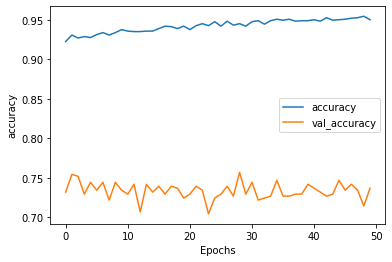

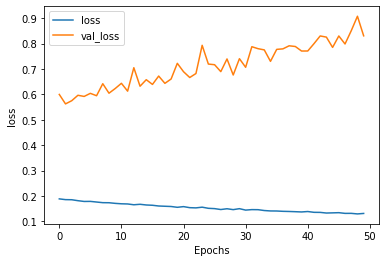

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
# gets the weight of embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

vocab = vectorize_layer.get_vocabulary()

import io

# write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
out_m.write('word\n') # column title

for word_num in range(0, vocab_size):
  word = vocab[word_num]
  embeddings = weights[word_num]
  # write down words to metadata
  out_m.write(word + '\n')
  # write down embedding to embedding file
  # tab before each dim and newline for dims for each word
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(500, 16)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>